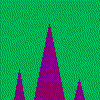

In [1]:
from dataclasses import dataclass

import numpy as np
from IPython.display import Image as Im
from PIL import Image, ImageDraw


@dataclass
class Spire():
    spire_height: float = 0.75
    spire_base_width: float = 0.5
    spire_base_center: float = 0.5
    base_wiggle: float = 1
    x_wiggle: float = 1
    y_wiggle: float = 1

    def polygon(self):
        spire_base_width_new = self.spire_base_width + self.base_wiggle * self.spire_base_width * 0.25
        base_0 = ((self.spire_base_center - spire_base_width_new / 2) * width,
                  0)
        base_1 = ((self.spire_base_center + spire_base_width_new / 2) * width,
                  0)
        wiggle_x = self.x_wiggle * 50
        wiggle_y = self.y_wiggle * 25

        top = (self.spire_base_center * width + wiggle_x,
               self.spire_height * height + wiggle_y)
        return [base_0, top, base_1]


images = []

height = 100
width = 100
frames = 100
color_1 = (0, 0, 0)
color_2 = (255, 255, 255)

#spire_height = 0.75
#spire_base_width = 0.5
#spire_base_center = 0.5

lightning_length = 0.3
lightning_angle = 45
lightning_zigs = 7
lightning_base_width = 0.25
lightning_start_horizontal = 0.75

for i in range(0, frames):
    N = (i / frames)
    sin_N = np.sin(5 * N * 2 * np.pi)
    sin_N3 = np.sin(5 * 3 * N * 2 * np.pi)
    sin_N5 = np.sin(20 * N * 2 * np.pi)

    im = Image.new('RGB', (width, height), "#00AF50")
    draw = ImageDraw.Draw(im)
    '''
    spire_base_width_new = spire_base_width + sin_N * spire_base_width * 0.25
    base_0 = ((spire_base_center - spire_base_width_new / 2) * width, 0)
    base_1 = ((spire_base_center + spire_base_width_new / 2) * width, 0)
    wiggle_x = sin_N * 50
    wiggle_y = sin_N3 * 25

    top = (spire_base_center * width + wiggle_x,
           spire_height * height + wiggle_y)
'''
    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N3,
              y_wiggle=sin_N5,
              spire_base_width=0.3)
    draw.polygon(s.polygon(), fill="#81007F")

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N3,
              y_wiggle=sin_N5,
              spire_base_center=0.2,
              spire_height=0.2,
              spire_base_width=0.1)
    draw.polygon(s.polygon(), fill="#81007F")

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N5,
              y_wiggle=sin_N3,
              spire_base_center=0.8,
              spire_height=0.3,
              spire_base_width=0.1)
    draw.polygon(s.polygon(), fill="#81007F")

    l_center = lightning_start_horizontal * width
    l_base_w = lightning_base_width * width
    l_poly = []
    l = lightning_length * (sin_N5 + 1)

    for z in range(lightning_zigs, 0, -1):
        x, y = l_center - (
            l_base_w / 2) * z / lightning_zigs, z * l * height / lightning_zigs
        l_poly.append((x, height - y))
        l_poly.append((x + 10, height - y))
    for z in range(lightning_zigs):
        x, y = l_center + (l_base_w / 2) * (z - 1) / lightning_zigs, (
            z - 1) * l * height / lightning_zigs
        l_poly.append((x, height - y))
        l_poly.append((x - 10, height - y))
    if sin_N5 > 0 and sin_N > 0:
        draw.polygon(l_poly, fill="yellow")
    images.append(im.rotate(180))

file_name = "spire_dance.gif"
images[0].save(file_name,
               save_all=True,
               append_images=images[1:],
               optimize=True,
               duration=1,
               loop=0)

Im(filename=file_name)